In [64]:
import pickle
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_validate, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from analise_data_ru import ROOT_PATH
from analise_data_ru.plot import get_almoco_and_janta_plot

RandomState(MT19937) at 0x7F6D0BCD3C40

In [65]:
train_df = pd.read_csv(ROOT_PATH / 'data' / 'processed' / 'train_data.csv')
test_df = pd.read_csv(ROOT_PATH / 'data' / 'processed' / 'test_data.csv')

In [66]:
train_df

,Data,ano,mes,dia_semana,dia,Qt_almoco,Qt_jantar
0,2016-01-04,2016,1,0,4,364,294
1,2016-01-05,2016,1,1,5,489,363
2,2016-01-06,2016,1,2,6,522,401
3,2016-01-07,2016,1,3,7,514,349
4,2016-01-08,2016,1,4,8,409,218
...,...,...,...,...,...,...,...
894,2019-10-29,2019,10,1,29,836,550
895,2019-10-30,2019,10,2,30,866,567
896,2019-10-31,2019,10,3,31,782,539
897,2019-11-01,2019,11,4,1,640,333


In [67]:
test_df

,Data,ano,mes,dia_semana,dia,Qt_almoco,Qt_jantar
0,2019-11-05,2019,11,1,5,915,562
1,2019-11-06,2019,11,2,6,852,581
2,2019-11-07,2019,11,3,7,809,485
3,2019-11-08,2019,11,4,8,677,329
4,2019-11-11,2019,11,0,11,743,526
...,...,...,...,...,...,...,...
75,2020-03-09,2020,3,0,9,843,639
76,2020-03-10,2020,3,1,10,1001,626
77,2020-03-11,2020,3,2,11,1002,611
78,2020-03-12,2020,3,3,12,953,549


In [68]:
X_almoco_train = train_df.drop(columns=['Qt_almoco', 'Qt_jantar', 'Data'])
y_almoco_train = train_df['Qt_almoco']

X_almoco_test = test_df.drop(columns=['Qt_almoco', 'Qt_jantar', 'Data'])
y_almoco_test = test_df['Qt_almoco']

In [69]:
X_janta_train = train_df.drop(columns=['Qt_almoco', 'Qt_jantar', 'Data'])
y_janta_train = train_df['Qt_jantar']

X_janta_test = test_df.drop(columns=['Qt_almoco', 'Qt_jantar', 'Data'])
y_janta_test = test_df['Qt_jantar']

In [70]:
n_samples, n_features = 10, 5
rand = np.random.RandomState(666)

y = rand.randn(n_samples)
X = rand.randn(n_samples, n_features)

transformer = Pipeline(
    steps=[
        ('preprocess', StandardScaler()),
    ]
)

regressors_almoco = {
    'KRR': (krr := KernelRidge()),
    'SVR': (svr := SVR()),
    'SGDR': (sgdr := SGDRegressor()),
    'MLP_regr': (mlp_regr := MLPRegressor()),
    'linear_reg': (linear := LinearRegression()),
    'random_forest': (rf := RandomForestRegressor()),
}

regressors_janta = {
    'KRR': (krr := KernelRidge()),
    'SVR': (svr := SVR()),
    'SGDR': (sgdr := SGDRegressor()),
    'MLP_regr': (mlp_regr := MLPRegressor()),
    'linear_reg': (linear := LinearRegression()),
    'random_forest': (rf := RandomForestRegressor()),
}

#### Treinamento dos dados do Almoço

In [71]:
trained_almoco_models = {}
for k, regr_almoco in regressors_almoco.items():
    print(f'Running Random Search for {k}:\n')
    regr_almoco.fit(X_almoco_train, y_almoco_train)
    print(f'Done {k}:\n')
    trained_almoco_models.update({k: regr_almoco})
    

Running Random Search for KRR:

Done KRR:

Running Random Search for SVR:

Done SVR:

Running Random Search for SGDR:

Done SGDR:

Running Random Search for MLP_regr:



Done MLP_regr:

Running Random Search for linear_reg:

Done linear_reg:

Running Random Search for random_forest:

Done random_forest:



In [72]:
trained_almoco_models

{'KRR': KernelRidge(),
 'SVR': SVR(),
 'SGDR': SGDRegressor(),
 'MLP_regr': MLPRegressor(),
 'linear_reg': LinearRegression(),
 'random_forest': RandomForestRegressor()}

#### Teste dos dados do Almoço

In [73]:
model_predictions_almoco = []
r2_list = []

for k, regr_almoco in regressors_almoco.items():
    print(f'Testing {k}:')
    r2 = r2_score(y_almoco_test, regr_almoco.predict(X_almoco_test))
    print(f'R2 {k}: {r2}')
    model_predictions_almoco.append({'model': regr_almoco, 'r2': r2})
    r2_list.append(r2)
    print('\n')

best_model_almoco = [model['model'] for model in model_predictions_almoco if model['r2'] == max(r2_list)][0]

Testing KRR:
R2 KRR: 0.027053640852796823


Testing SVR:
R2 SVR: -0.3721212618109404


Testing SGDR:
R2 SGDR: -5.495594509187443e+24


Testing MLP_regr:
R2 MLP_regr: -0.11544626629317056


Testing linear_reg:
R2 linear_reg: -0.11649979407649469


Testing random_forest:
R2 random_forest: 0.8052314445903084




#### Treinamento dos dados da Janta

In [74]:
trained_janta_models = {}
for k, regr_janta in regressors_janta.items():
    print(f'Running the training for {k}:\n')
    regr_janta.fit(X_janta_train, y_janta_train)
    print(f'Done {k}:\n')
    trained_janta_models.update({k: regr_janta})

Running the training for KRR:

Done KRR:

Running the training for SVR:



Done SVR:

Running the training for SGDR:

Done SGDR:

Running the training for MLP_regr:



/home/aizen/dev/comp-eng/analise_data_ru/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Done MLP_regr:

Running the training for linear_reg:

Done linear_reg:

Running the training for random_forest:

Done random_forest:



In [75]:
model_predictions_janta = []
r2_list = []

for k, regr_janta in regressors_janta.items():
    print(f'Testing {k}:')
    r2 = r2_score(y_janta_test, regr_janta.predict(X_janta_test))
    print(f'R2 {k}: {r2}')
    model_predictions_janta.append({'model': regr_janta, 'r2': r2})
    r2_list.append(r2)
    print('\n')

best_model_janta = [model['model'] for model in model_predictions_janta if model['r2'] == max(r2_list)][0]

Testing KRR:
R2 KRR: 0.02595432722442126


Testing SVR:
R2 SVR: -0.4856057278053105


Testing SGDR:
R2 SGDR: -5.075958936594443e+24


Testing MLP_regr:
R2 MLP_regr: -0.07270561372918394


Testing linear_reg:
R2 linear_reg: -0.05703525851512681


Testing random_forest:
R2 random_forest: 0.8134076762427436




In [76]:
test_df

,Data,ano,mes,dia_semana,dia,Qt_almoco,Qt_jantar
0,2019-11-05,2019,11,1,5,915,562
1,2019-11-06,2019,11,2,6,852,581
2,2019-11-07,2019,11,3,7,809,485
3,2019-11-08,2019,11,4,8,677,329
4,2019-11-11,2019,11,0,11,743,526
...,...,...,...,...,...,...,...
75,2020-03-09,2020,3,0,9,843,639
76,2020-03-10,2020,3,1,10,1001,626
77,2020-03-11,2020,3,2,11,1002,611
78,2020-03-12,2020,3,3,12,953,549


In [77]:
y_almoco_pred = best_model_almoco.predict(X_almoco_test)
y_janta_pred = best_model_janta.predict(X_janta_test)

In [78]:
predicted_df = pd.DataFrame(
    {
        'Data': test_df['Data'],
        'Qt_almoco': y_almoco_pred,
        'Qt_jantar': y_janta_pred,        
    }
)

In [79]:
predicted_df

,Data,Qt_almoco,Qt_jantar
0,2019-11-05,898.77,562.91
1,2019-11-06,896.76,565.37
2,2019-11-07,830.54,542.15
3,2019-11-08,653.14,279.38
4,2019-11-11,791.68,563.07
...,...,...,...
75,2020-03-09,757.96,497.26
76,2020-03-10,875.96,543.01
77,2020-03-11,852.20,543.22
78,2020-03-12,817.07,522.26


/home/aizen/dev/comp-eng/analise_data_ru/analise_data_ru/plot.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[index].set_xticklabels(ax[index].get_xticklabels(), rotation=45)
/home/aizen/dev/comp-eng/analise_data_ru/analise_data_ru/plot.py:39: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(plots, labels=labels, loc='upper right',)


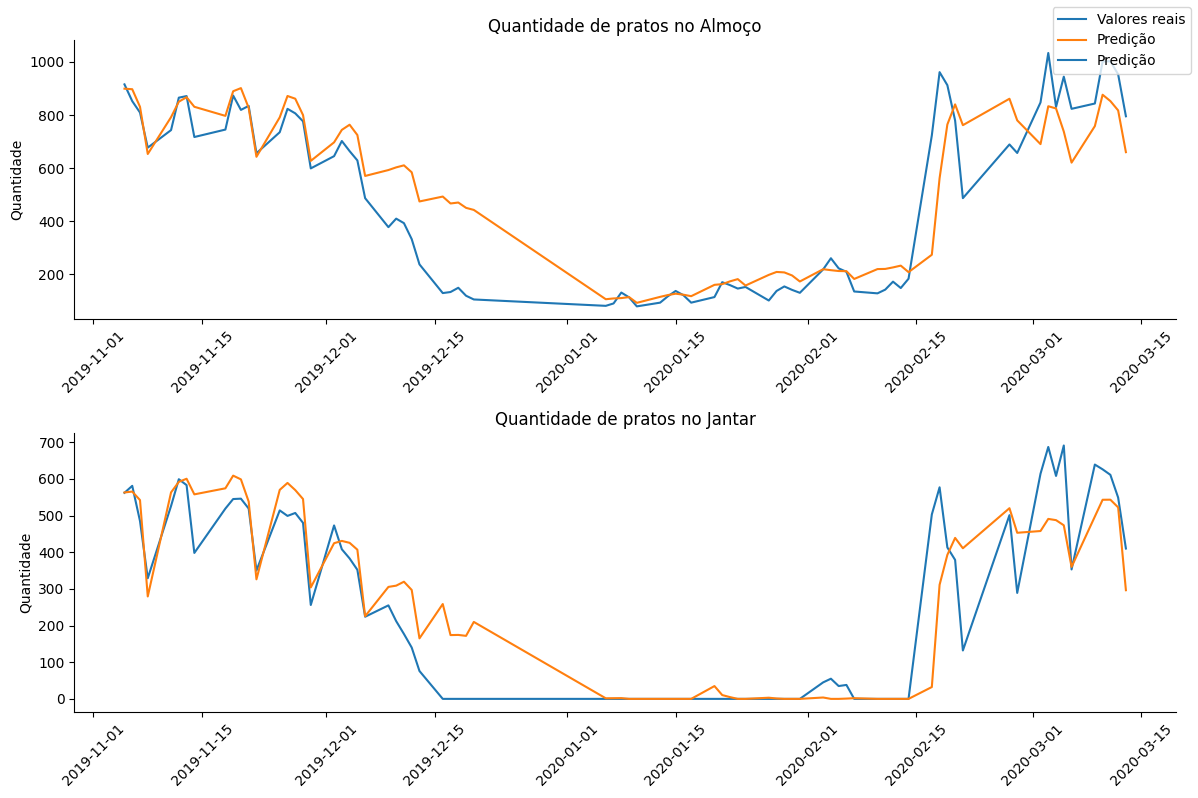

In [80]:
get_almoco_and_janta_plot(test_df, predicted_df)

In [81]:
best_model_almoco

RandomForestRegressor()

In [82]:
best_model_janta

RandomForestRegressor()

In [84]:
with open(ROOT_PATH / 'models' / 'best_model_almoco_padrao.plk', 'wb') as best_almoco_file:
    pickle.dump(best_model_almoco, best_almoco_file)

with open(ROOT_PATH / 'models' / 'best_model_janta_padrao.plk', 'wb') as best_janta_file:
    pickle.dump(best_model_janta, best_janta_file)